# Proyecto EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import time

In [2]:
## Ruta donde se encuentra ubicado el dataset
path = kagglehub.dataset_download("abhijitdahatonde/zomato-restaurants-dataset")
print("Path to dataset files:", path)
print("Archivos descargados:", os.listdir(path))

100%|██████████| 181k/181k [00:00<00:00, 60.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abhijitdahatonde/zomato-restaurants-dataset/versions/1
Archivos descargados: ['zomato.csv']


In [3]:
## Lectura del dataset
csv_file = os.path.join(path,"zomato.csv")
df = pd.read_csv(csv_file)

In [61]:
## Descargamos el fichero para tenerlo en local
df.to_csv("zomato.csv",index=False)

## Exploración

In [4]:
df.head(10)  ## A simple vista observamos dos columnas duplicadas que aportan misma información
             ## Hay carácteres no alpha-numéricos en el campo de restaurant name
             ## Nombre de las columnas algo difuso

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
5,5,5,'@99,"Takeaway, Delivery",3.4,37,200.0,No,No,"Mughlai, Biryani, Chinese, North Indian",Whitefield,Whitefield
6,6,6,'@Italy,Casual Dining,4.1,305,700.0,Yes,No,Italian,Banashankari,Kumaraswamy Layout
7,7,7,'@North Parontha Hut,"Takeaway, Delivery",2.8,40,300.0,No,No,North Indian,Indiranagar,Old Airport Road
8,8,8,1000 B.C,Quick Bites,3.2,49,300.0,Yes,No,"Arabian, Sandwich, Rolls, Burger","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
9,9,9,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,Casual Dining,3.7,41,450.0,No,No,"Biryani, North Indian","Byresandra,Tavarekere,Madiwala",BTM


In [119]:
## Distribución de las columnas
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'restaurant name', 'restaurant type',
       'rate (out of 5)', 'num of ratings', 'avg cost (two people)',
       'online_order', 'table booking', 'cuisines type', 'area',
       'local address'],
      dtype='object')

In [129]:
## Rango de las variables
print(f"{df["Unnamed: 0"].value_counts()}\n")
print(f"{df["restaurant name"].value_counts()}\n")
print(f"{df["restaurant type"].value_counts()}\n")
print(f"{df["rate (out of 5)"].value_counts()}\n")
print(f"{df["num of ratings"].value_counts()}\n")
print(f"{df["avg cost (two people)"].value_counts()}\n")
print(f"{df["online_order"].value_counts()}\n")
print(f"{df["table booking"].value_counts()}\n")
print(f"{df["cuisines type"].value_counts()}\n")
print(f"{df["area"].value_counts()}\n")
print(f"{df["local address"].value_counts()}\n")

Unnamed: 0
7104    1
7088    1
7087    1
7086    1
7085    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 7105, dtype: int64

restaurant name
Zyksha                    1
Zen - The Leela Palace    1
Zeeshan                   1
Zeee's                    1
ZEEES                     1
                         ..
'@99                      1
'@ The Bbq                1
'@ Biryani Central        1
#refuel                   1
#L-81 Cafe                1
Name: count, Length: 7105, dtype: int64

restaurant type
Quick Bites                  2840
Casual Dining                1634
Cafe                          403
Delivery                      358
Takeaway, Delivery            289
                             ... 
Food Court, Beverage Shop       1
Quick Bites, Food Court         1
Casual Dining, Sweet Shop       1
Quick Bites, Meat Shop          1
Club, Casual Dining             1
Name: count, Length: 81, dtype: int64

rate (out of 5)
2.8    749
3.7    618
3.6   

In [5]:
df.info() ## A simple vista podemos observar el tipo de datos (int64, float64, objeto) asi como qué campos
          ## tienen registros Not a Number(NaN), que nos encargaremos más adelante de rellenar dichos valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [131]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7037.000000,7105.000000,7048.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.463249,592.171049,462.902305
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


In [6]:
df.columns[df.isna().any()] ## "rate (out of 5)"" y "avg cost (two people)"" tienen registros con valores NaN

Index(['rate (out of 5)', 'avg cost (two people)'], dtype='object')

In [7]:
df.shape ## El dataset tiene 7105 registros y 12 campos

(7105, 12)

## Limpieza de los datos

In [111]:
## Trabajamos con la copia para no modificar el dataset original y poder regresar al
## inicio ante cualquier error de limpieza de datos
df_copia=df.copy()

In [114]:
def limpieza_dataset(df_copia):
  print(f"Las dimensiones del dataset:\n \t{df_copia.shape[0]} resgistros y {df_copia.shape[1]} campos\n")
  time.sleep(3)

  ## Eliminanos el campo "Unnamed: 0"
  df_copia.drop("Unnamed: 0",axis=1, inplace=True)

  ## Renombramos el nombre de todos los campos de nuestro dataset
  df_copia.rename(columns={"Unnamed: 0.1": "Restaurante_ID","restaurant name": "Nombre", "restaurant type": "Tipo", "rate (out of 5)": "Valoración",
       "num of ratings": "Número de reseñas", "avg cost (two people)": "Costo promedio (para dos personas)", "online_order": "Pedido a domicilio",
       "table booking": "Reserva de mesa", "cuisines type": "Tipo de cocina", "area": "Area", "local address": "Dirección"}, inplace=True)
  print(f"Drop campo duplicado Unnamed: 0 y Renombrando los campos de nuestro dataset:\n \t{df_copia.columns}\n")
  time.sleep(3)


  ## Eliminamos los caracteres que no pertenecen al alfabeto latino
  print(f"Limpiando carácteres que no pertenecen al alfabeto latino en el campo Nombre del restaurante")
  ## Todo caracter que pertenezca al conjunto a-z A-Z y " ", lo elimina
  df_copia["Nombre"]=df_copia["Nombre"].str.replace(r"[^a-zA-Z ]+", "", regex=True)
  time.sleep(3)
  print(f"\tHecho\n")
  time.sleep(2)

  print(f"Limpiando valores nulos")
  ## Rellenar los valores NaN por el valor medio de las valoraciones
  promedio_valoraciones=df_copia['Valoración'].mean()
  df_copia["Valoración"] = df_copia["Valoración"].fillna(promedio_valoraciones)
    ## Otra forma de modificar los valores NaN:
      ## df_copia.loc[df_copia["Valoración"].isna(), "Valoración"]=promedio_valoraciones

  ## Rellenar los valores NaN por el valor medio del costo promedio
  promedio_costo=df_copia["Costo promedio (para dos personas)"].mean()
  df_copia["Costo promedio (para dos personas)"]=df_copia["Costo promedio (para dos personas)"].fillna(promedio_costo)
  time.sleep(3)
  print(f"\tNo hay valores NaN en el dataset\n \t{df_copia.columns[df_copia.isna().any()]}\n")
  time.sleep(3)

  print(f"Modificando la categoria del campo Pedido en línea: {df_copia["Pedido a domicilio"].unique()}")
  ## Cambio de etiqueta "Yes" a "Sí" en el campo Pedido a domicilio
  df_copia.loc[df_copia["Pedido a domicilio"].str.lower() == "yes", "Pedido a domicilio"] = "Si"
  ## Dos formas de hacer lo mismo:
  ##1. df_copia["Pedido a domicilio"] = df_copia["Pedido a domicilio"].apply(
    ##   lambda x: "Si" if str(x).lower() == "yes" else "No"

  ##2. for idx, valor in enumerate(df_copia["Pedido a domicilio"]):
    ##   if str(valor).lower() == "yes":
    ##        df_copia.at[idx, "Pedido a domicilio"] = "Si"
    ##   else:
    ##       df_copia.at[idx, "Pedido a domicilio"] = "No"
  ## Cambio de etiqueta "Yes" a "Sí" en el campo Reserva de mesa
  time.sleep(3)
  print(f"\t{df_copia["Pedido a domicilio"].unique()}\n")
  time.sleep(2)

  print(f"Modificando la categoria del campo Reserva de mesa: {df_copia["Reserva de mesa"].unique()}")
  df_copia.loc[df_copia["Reserva de mesa"].str.lower() == "yes", "Reserva de mesa"] = "Si"
  time.sleep(3)
  print(f"\t{df_copia["Reserva de mesa"].unique()}\n")
  time.sleep(2)
  print(f"Limpiando registros duplicados\n")
  df_copia = df_copia.drop_duplicates(keep="last",inplace=True)    # conserva el último
  time.sleep(3)
  print(f"\tHecho.Hay {df_copia.shape[0]} registros y {df_copia.shape[1]} campos\n")



In [113]:
limpieza_dataset(df_copia)

Las dimensiones del dataset:
 	7105 resgistros y 12 campos

Drop campo duplicado Unnamed: 0 y Renombrando los campos de nuestro dataset:
 	Index(['Restaurante_ID', 'Nombre', 'Tipo', 'Valoración', 'Número de reseñas',
       'Costo promedio (para dos personas)', 'Pedido a domicilio',
       'Reserva de mesa', 'Tipo de cocina', 'Area', 'Dirección'],
      dtype='object')

Limpiando carácteres que no pertenecen al alfabeto latino en el campo Nombre del restaurante
	Hecho

Limpiando valores nulos
	No hay valores NaN en el dataset
 	Index([], dtype='object')

Modificando la categoria del campo Pedido en línea: ['No' 'Yes']
	['No' 'Si']

Modificando la categoria del campo Reserva de mesa: ['No' 'Yes']
	['No' 'Si']

Limpiando registros duplicados

	Heccho. Hay 7105 registros y 11 campos



In [108]:
df_copia.head(10)

,Restaurante_ID,Nombre,Tipo,Valoración,Número de reseñas,Costo promedio (para dos personas),Pedido a domicilio,Reserva de mesa,Tipo de cocina,Area,Dirección
0,0,FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,L Cafe,Quick Bites,3.9,48,400.0,Si,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,refuel,Cafe,3.7,37,400.0,Si,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,Biryani Central,Casual Dining,2.7,135,550.0,Si,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,The Bbq,Casual Dining,2.8,40,700.0,Si,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
5,5,,"Takeaway, Delivery",3.4,37,200.0,No,No,"Mughlai, Biryani, Chinese, North Indian",Whitefield,Whitefield
6,6,Italy,Casual Dining,4.1,305,700.0,Si,No,Italian,Banashankari,Kumaraswamy Layout
7,7,North Parontha Hut,"Takeaway, Delivery",2.8,40,300.0,No,No,North Indian,Indiranagar,Old Airport Road
8,8,BC,Quick Bites,3.2,49,300.0,Si,No,"Arabian, Sandwich, Rolls, Burger","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
9,9,C,Casual Dining,3.7,41,450.0,No,No,"Biryani, North Indian","Byresandra,Tavarekere,Madiwala",BTM


In [31]:
## Una vez limpiado el dataset, lo guardamos
df_copia.to_csv("restaurante_zomato.csv", index=False, encoding="utf-8")


## Consultas
###1. Los 10 restaurantes mejor valorados
###2. Gasto promedio según el tipo de restaurante
###3. Los restaurantes con más reseñas
###4. ¿Qué restaurantes ofrecen servicio a domicilio?


####1. Los 10 restaurantes mejor valorados

In [115]:
df_copia[["Nombre", "Tipo", "Valoración"]].sort_values(by="Valoración", ascending=False).head(10)

,Nombre,Tipo,Valoración
466,Asia Kitchen By Mainland China,"Casual Dining, Bar",4.9
5271,Sant Spa Cuisine,Casual Dining,4.9
1035,Byg Brewski Brewing Company,Microbrewery,4.9
4444,OG Variar Sons,Bakery,4.8
4827,Punjab Grill,Casual Dining,4.8
6496,The Pizza Bakery,Casual Dining,4.8
668,Belgian Waffle Factory,Dessert Parlor,4.8
7040,You Mee,Casual Dining,4.7
6140,TBC Sky Lounge,"Casual Dining, Bar",4.7
6242,The Black Pearl,"Casual Dining, Bar",4.7


###2.Gasto promedio según el tipo de restaurante

In [116]:
df_copia.groupby("Tipo").agg({"Costo promedio (para dos personas)": "mean"}).sort_values(by="Costo promedio (para dos personas)",
                                                                                                   ascending=False).round(2)
#

,Costo promedio (para dos personas)
Tipo,
"Fine Dining, Lounge",3000.00
"Fine Dining, Microbrewery",3000.00
"Fine Dining, Bar",2862.50
Fine Dining,2784.81
"Bar, Lounge",2450.00
...,...
"Sweet Shop, Quick Bites",212.90
Beverage Shop,206.36
"Food Court, Beverage Shop",200.00


###3. Los restaurantes con más reseñas

In [117]:
df_copia[["Nombre", "Número de reseñas", "Valoración"]].sort_values(by="Número de reseñas", ascending=False).head(10)


,Nombre,Número de reseñas,Valoración
1035,Byg Brewski Brewing Company,16345,4.9
6665,Toit,14956,4.7
6242,The Black Pearl,10413,4.7
770,Big Pitcher,9272,4.6
423,Arbor Brewing Company,8375,4.5
4808,Prost Brew Pub,7854,4.5
1489,Church Street Social,7544,4.3
2632,Hoot,7193,4.2
2149,Flechazo,7154,4.7
6380,The Hole in the Wall Cafe,7113,4.6


###4. ¿Qué restaurantes ofrecen servicio a domicilio?

In [118]:
df_copia[df_copia["Pedido a domicilio"]=="Si"][["Nombre", "Tipo de cocina", "Area"]]

,Nombre,Tipo de cocina,Area
1,L Cafe,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala"
2,refuel,"Cafe, Beverages",Bannerghatta Road
3,Biryani Central,"Biryani, Mughlai, Chinese",Marathahalli
4,The Bbq,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur
6,Italy,Italian,Banashankari
...,...,...,...
7098,Zodiac Fortune Select JP Cosmos Hotel,"North Indian, South Indian, Chinese, Continental",Brigade Road
7099,Zodiac Grills,"North Indian, Chinese",HSR
7100,Zoeys,"Cafe, Italian, Continental, Burger",Bellandur
7101,ZOROY Luxury Chocolate,Desserts,Brigade Road


## Visualización

In [18]:
# Ruta para acceder al dataset
path_video = kagglehub.dataset_download("migeruj/videogames-predictive-model")

print("Path to dataset files:", path_video)

100%|██████████| 71.6k/71.6k [00:00<00:00, 31.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/migeruj/videogames-predictive-model/versions/1


In [19]:
print("Archivos descargados:", os.listdir(path_video))

Archivos descargados: ['dato.csv']


In [20]:
csv_video = os.path.join(path_video,"dato.csv")
df_video = pd.read_csv(csv_video)

In [62]:
## Descargamos el fichero para tenerlo en local
df_video.to_csv("dato.csv",index=False)

In [21]:
df_video.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo


In [22]:
df_video.info() ## Tipo de datos: Objetos
                ## No hay NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Platform            7112 non-null   object
 1   Genre               7112 non-null   object
 2   Publisher           7112 non-null   object
 3   NA_Sales            7112 non-null   object
 4   EU_Sales            7112 non-null   object
 5   JP_Sales            7112 non-null   object
 6   Other_Sales         7112 non-null   object
 7   Global_Sales        7112 non-null   object
 8   Rating              7112 non-null   object
 9   Critic_Score_Class  7112 non-null   object
dtypes: object(10)
memory usage: 555.8+ KB


In [132]:
df_video.columns

Index(['Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Rating', 'Critic_Score_Class'],
      dtype='object')

In [24]:
## No hay valores NaN
df_video.columns[df_video.isna().any()]

Index([], dtype='object')

In [26]:
df_video["NA_Sales"].values ## Los valores númericos estan en formato string

array(['41,36', '15,68', '15,61', ..., '0', '0', '0'], dtype=object)

In [27]:
## Trabajamos con una copia del dataset original
df_video_copia=df_video.copy()

In [28]:
def limpieza_dataset_vdeo(df_video_copia):
  ## El carácter ',' no se lee como un número decimal
  df_video_copia["Global_Sales"] = (df_video_copia["Global_Sales"].astype(str).str.replace(",", "."))
  df_video_copia["NA_Sales"] = (df_video_copia["NA_Sales"].astype(str).str.replace(",", "."))
  df_video_copia["EU_Sales"] = (df_video_copia["EU_Sales"].astype(str).str.replace(",", "."))
  df_video_copia["JP_Sales"] = (df_video_copia["JP_Sales"].astype(str).str.replace(",", "."))
  df_video_copia["Other_Sales"] = (df_video_copia["Other_Sales"].astype(str).str.replace(",", "."))

  ## Conversión string-numérico. Si encuentra un carácter no númerico, deovera Nan
  df_video_copia["Global_Sales"] = pd.to_numeric(df_video_copia["Global_Sales"], errors="coerce")
  df_video_copia["NA_Sales"] = pd.to_numeric(df_video_copia["NA_Sales"], errors="coerce")
  df_video_copia["EU_Sales"] = pd.to_numeric(df_video_copia["EU_Sales"], errors="coerce")
  df_video_copia["JP_Sales"] = pd.to_numeric(df_video_copia["JP_Sales"], errors="coerce")
  df_video_copia["Other_Sales"] = pd.to_numeric(df_video_copia["Other_Sales"], errors="coerce")

In [29]:
limpieza_dataset_vdeo(df_video_copia)

In [30]:
df_video_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Platform            7112 non-null   object 
 1   Genre               7112 non-null   object 
 2   Publisher           7112 non-null   object 
 3   NA_Sales            7112 non-null   float64
 4   EU_Sales            7112 non-null   float64
 5   JP_Sales            7112 non-null   float64
 6   Other_Sales         7112 non-null   float64
 7   Global_Sales        7112 non-null   float64
 8   Rating              7112 non-null   object 
 9   Critic_Score_Class  7112 non-null   object 
dtypes: float64(5), object(5)
memory usage: 555.8+ KB


In [40]:
df_video_copia.to_csv("videogames.csv",index=False,encoding="utf-8")


### Histograma

In [136]:
df_video['Rating'].value_counts()

,count
Rating,
T,2489
E,2162
M,1489
E10+,968
RP,2
AO,1
K-A,1


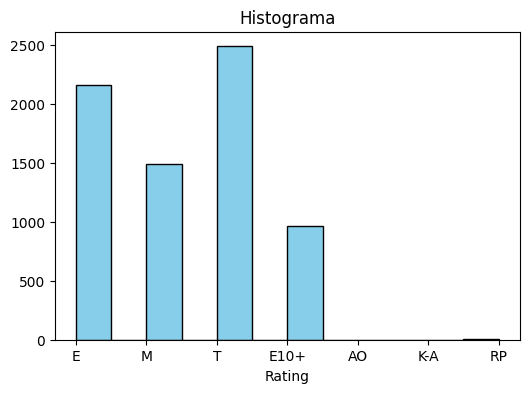

In [135]:
plt.figure(figsize=(6,4))
plt.hist(df_video["Rating"],bins=12, color="skyblue", edgecolor="black")
plt.title("Histograma")
plt.xlabel("Rating")
plt.ylabel("")
plt.show()

##### Este histograma nos aporta el grado de satisfación de los jugadores

### Las ventas de cada plataforma por región

In [33]:
ventas=df_video_copia.groupby("Platform").agg({"NA_Sales": "sum", "EU_Sales": "sum", "JP_Sales": "sum", "Other_Sales": "sum", "Global_Sales": "sum", }).sort_values(by="Global_Sales", ascending=False)

In [35]:
ventas

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,483.06,261.19,76.49,145.19,965.91
X360,543.08,238.15,10.34,76.65,868.48
PS3,345.50,276.65,55.26,116.01,793.33
Wii,354.14,208.30,52.84,61.05,676.39
DS,175.29,95.65,84.04,30.05,385.21
PS4,92.51,120.47,10.79,41.26,264.91
X,156.93,51.36,1.20,7.46,217.10
PS,94.56,65.83,38.87,11.66,210.81
PC,66.37,109.65,0.17,18.66,195.51


### Gráfico circular

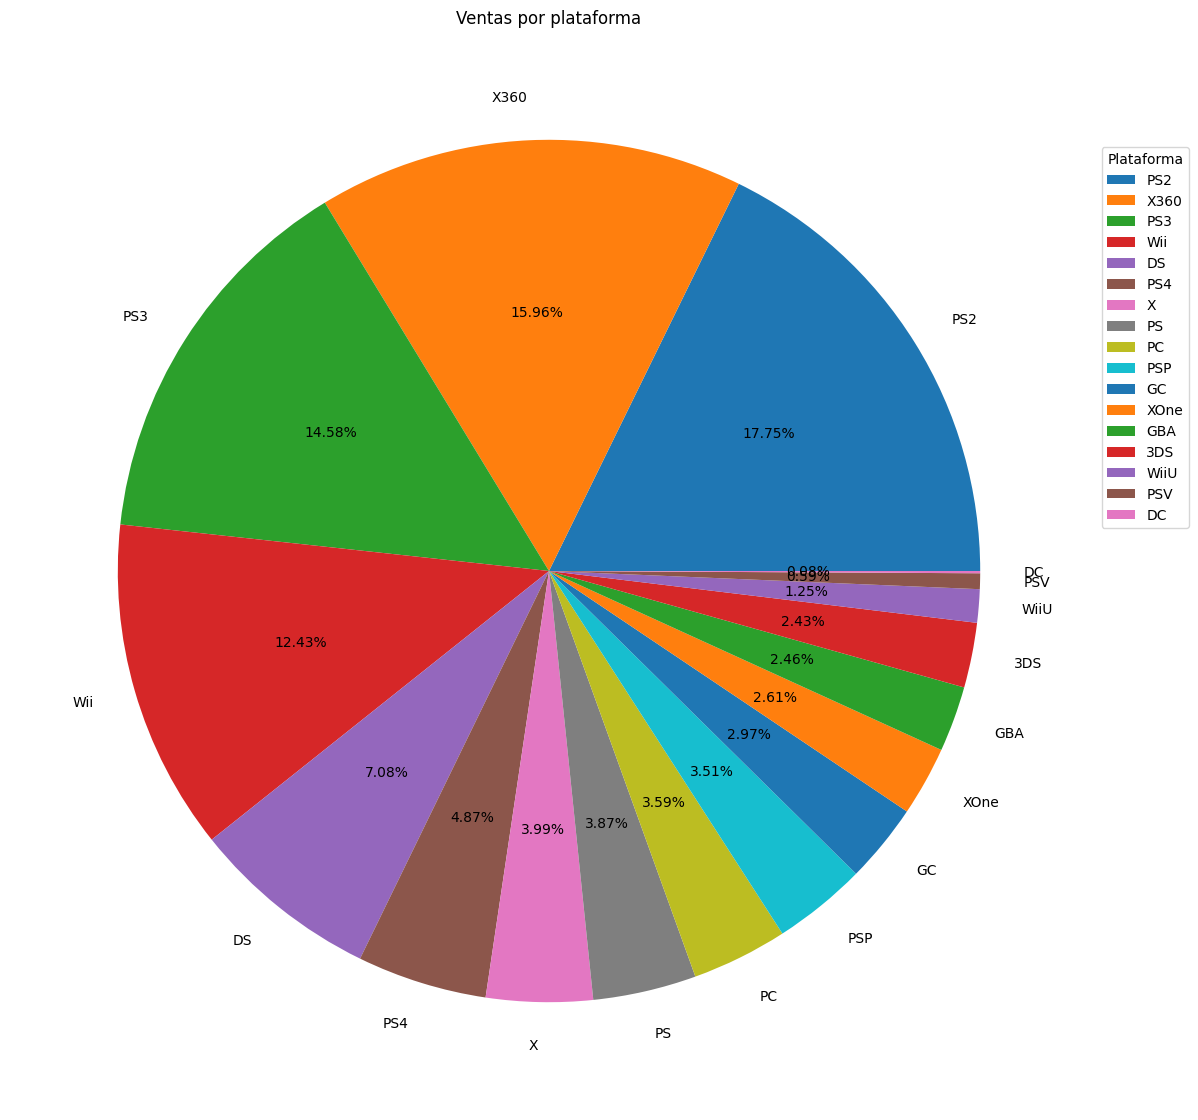

In [39]:
ventas.plot.pie(y="Global_Sales", autopct="%2.2f%%", figsize=(18,14))
plt.legend(title="Plataforma", loc="upper right",bbox_to_anchor=(1.1, 0.9))
plt.ylabel("")
plt.title("Ventas por plataforma")
plt.show()

##### El gráfico representa la distribución porcentual de las ventas entre las distintas plataformas

### Gráfico de barras

In [58]:
cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]



In [57]:
ventas.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,483.06,261.19,76.49,145.19,965.91
X360,543.08,238.15,10.34,76.65,868.48
PS3,345.50,276.65,55.26,116.01,793.33
Wii,354.14,208.30,52.84,61.05,676.39
DS,175.29,95.65,84.04,30.05,385.21


In [59]:
df_plot = ventas[cols].reset_index().melt(
    id_vars="Platform",
    value_vars=cols,
    var_name="Region",
    value_name="Sales"
)


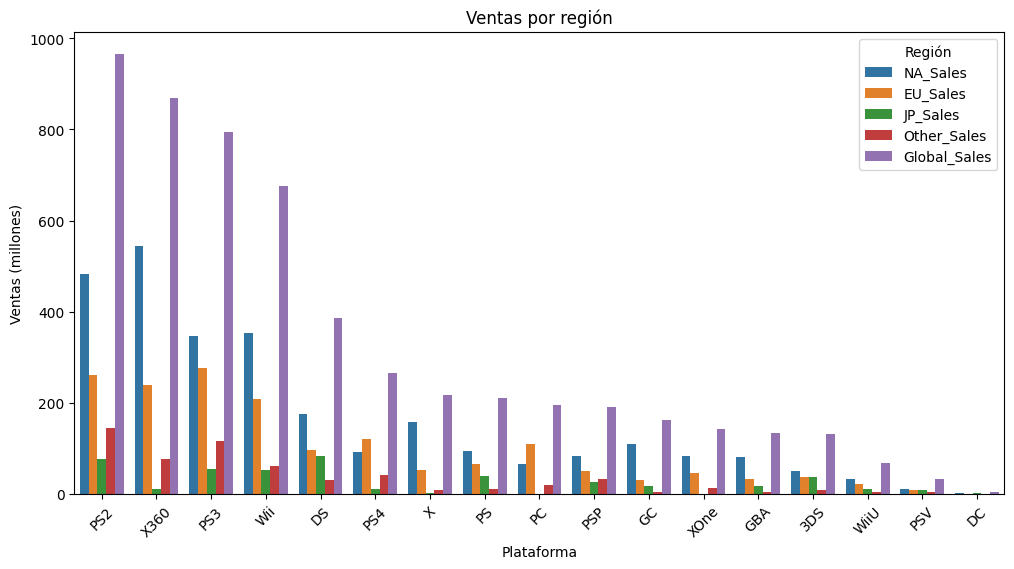

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x="Platform", y="Sales", hue="Region")
plt.title("Ventas por región")
plt.xlabel("Plataforma")
plt.ylabel("Ventas (millones)")
plt.legend(title="Región")
plt.xticks(rotation=45)
plt.show()